## Title

In today's digital age, a significant amount of information is still stored in analog formats, such as handwritten notes, printed documents, and signage. Converting this analog text into digital format can be a time-consuming and error-prone process, hindering productivity and accessibility.  Our solution aims to accurately interpret text content from images and convert it into editable digital format. This technology has the potential to revolutionize various industries, including document digitization, data analysis, and accessibility services.

# Importing necesary libraries

In [1]:
#pip install opencv-python
#!pip install -q keras-ocr
#!pip install tensorflow

In [1]:
import cv2
import matplotlib.pyplot as plt
import keras_ocr
import math
import pandas as pd
import numpy as np

In [9]:
def process_image(images):
    # Load the image
    for imgpath in images:
        img = cv2.imread(imgpath)

        # Initialize the Keras OCR pipeline
        pipeline = keras_ocr.pipeline.Pipeline()

        # Extract text from the
        predictions = pipeline.recognize([img])[0]

        #Plot the image with the extracted text
        fig, ax = plt.subplots(figsize=(3, 4))
        keras_ocr.tools.drawAnnotations(image=img, predictions=predictions, ax=ax)
        plt.show()
        print ("\nFirst two tuples:",predictions[0],'\n',predictions[1])
        print ("Type of predictions:",type(predictions))
        print ("Type of items in predictions:",type(predictions[0]))
        print ("Type of the words:",type(predictions[0][0]))
        print ("Type of its position:",type(predictions[0][1]))
        print("top-left:",predictions[0][1][0])
        print("top-right:",predictions[0][1][1])
        print("bottom-left:",predictions[0][1][2])
        print("bottom-right:",predictions[0][1][3])
    return predictions
'''This will return a tuple consisting of string and array of its position in the order of...(word, ([[top-left], [top-right],
[bottom-right], [bottom-left]]))'''

'This will return a tuple consisting of string and array of its position in the order of...(word, ([[top-left], [top-right],\n[bottom-right], [bottom-left]]))'

The text was extracted from an image using Keras-OCR and sorted using the Pythagorean Theorem. The center of each bounding box is measured in distances from the origin (0,0), and the list of distances is sorted according to unique rows and columns. If the triangle widens, the row remains the same; if it grows longer beyond the given threshold, the row changes. The results are stored in a list of dictionaries containing multiple key-value pairs.

In [3]:
def get_distance(predictions):
    """
    Function returns dictionary with (key,value):
        * text : detected text in image
        * center_x : center of bounding box (x)
        * center_y : center of bounding box (y)
        * distance_from_origin : hypotenuse
        * distance_y : distance between y and origin (0,0)
    """
    
    # Point of origin
    x0, y0 = 0, 0
    detections = []
    for group in predictions:
        # Get center point of bounding box
        top_left_x, top_left_y = group[1][0]
        bottom_right_x, bottom_right_y = group[1][1]
        center_x = (top_left_x + bottom_right_x) / 2
        center_y = (top_left_y + bottom_right_y) / 2
        # Use the Pythagorean Theorem to solve for distance from origin
        distance_from_origin = math.dist([x0,y0], [center_x, center_y])
        # Calculate difference between y and origin to get unique rows
        distance_y = center_y - y0
        # Append all results
        detections.append({
                            'text':group[0],
                            'center_x':center_x,
                            'center_y':center_y,
                            'distance_from_origin':distance_from_origin,
                            'distance_y':distance_y
                        })
    return detections


In [4]:
def distinguish_rows(lst, thresh=15):
    """Function to help distinguish unique rows"""
    
    sublists = [] 
    for i in range(0, len(lst)-1):
        if lst[i+1]['distance_y'] - lst[i]['distance_y'] <= thresh:
            if lst[i] not in sublists:
                sublists.append(lst[i])
            sublists.append(lst[i+1])
        else:
            yield sublists
            sublists = [lst[i+1]]
    yield sublists


Looking for C:\Users\Pareshbhai\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Pareshbhai\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 6s 6s/step


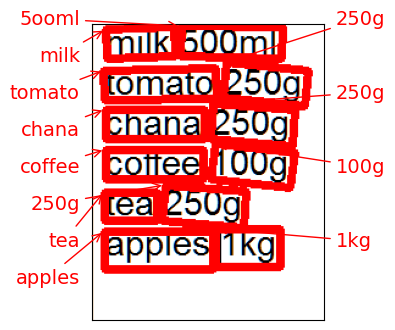


First two tuples: ('5ooml', array([[ 73.13452  ,   1.4666884],
       [156.37582  ,   2.9531403],
       [155.92093  ,  28.427156 ],
       [ 72.67963  ,  26.940704 ]], dtype=float32)) 
 ('milk', array([[11.533537 ,  4.2074013],
       [67.82344  ,  2.643793 ],
       [68.4973   , 26.902853 ],
       [12.207397 , 28.466461 ]], dtype=float32))
Type of predictions: <class 'list'>
Type of items in predictions: <class 'tuple'>
Type of the words: <class 'str'>
Type of its position: <class 'numpy.ndarray'>
top-left: [73.13452    1.4666884]
top-right: [156.37582     2.9531403]
bottom-left: [155.92093   28.427156]
bottom-right: [72.67963  26.940704]

Text and their distance from origin:
 [[{'text': '5ooml', 'center_x': 114.75517272949219, 'center_y': 2.209914207458496, 'distance_from_origin': 114.77644962700282, 'distance_y': 2.209914207458496}, {'text': 'milk', 'center_x': 39.678489685058594, 'center_y': 3.4255971908569336, 'distance_from_origin': 39.826087678823136, 'distance_y': 3.42559719

In [15]:
image=["listSample3.png"]
predictions=process_image(image)
predictions=get_distance(predictions)
predictions = list(distinguish_rows(predictions))
predictions = list(filter(lambda x:x!=[], predictions))# Remove all empty rows
print("\nText and their distance from origin:\n",predictions)
ordered_preds = []
order='yes'
ylst = ['yes', 'y']
for pr in predictions:
    if order in ylst: 
        row = sorted(pr, key=lambda x:x['distance_from_origin'])
        for each in row: 
            ordered_preds.append(each['text'])
print("\nItems in sorted order according to the rows and columns:\n",ordered_preds)

In [11]:
items,quantity=[],[]
for i in range(0,len(ordered_preds),2):
    items.append(ordered_preds[i])
    quantity.append(ordered_preds[i+1])
    order=dict(zip(items,quantity))
print("The final Order dictionary:",order)

The final Order dictionary: {'milk': '5ooml', 'tomato': '250g', 'chana': '250g', 'coffee': '100g', 'tea': '250g', 'apples': '1kg'}


In [12]:
print(list(order.keys()))

['milk', 'tomato', 'chana', 'coffee', 'tea', 'apples']


In [13]:
order_data=pd.DataFrame()
order_data['Items']=list(order.keys())
order_data['Quantity']=list(order.values())


In [14]:
order_data

,Items,Quantity
0,milk,5ooml
1,tomato,250g
2,chana,250g
3,coffee,100g
4,tea,250g
5,apples,1kg
